In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',-1)

In [2]:
df = pd.read_csv('IPL_ball_by_ball.csv')

In [3]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

GETTING RUNS SCORED ON EACH BALL

In [6]:
df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x==0 else 0 )
df['isone'] = df['runs_off_bat'].apply(lambda x: 1 if x==1 else 0 )
df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x==2 else 0 )
df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x==3 else 0 )
df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x==4 else 0 )
df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x==6 else 0 )

In [6]:
df.striker.unique()

array(['SC Ganguly', 'W Jaffer', 'JH Kallis', 'CL White', 'MV Boucher',
       'BB McCullum', 'Mohammad Hafeez', 'R Dravid', 'V Kohli', 'P Kumar',
       'Z Khan', 'SB Joshi', 'AA Noffke', 'B Akhil', 'RT Ponting',
       'DJ Hussey', 'M Kaif', 'RA Jadeja', 'M Rawat', 'D Salunkhe',
       'DS Lehmann', 'SK Warne', 'IK Pathan', 'YK Pathan', 'T Kohli',
       'SM Katich', 'SR Watson', 'G Gambhir', 'SK Trivedi', 'S Dhawan',
       'V Sehwag', 'KC Sangakkara', 'MEK Hussey', 'JDP Oram', 'SK Raina',
       'S Badrinath', 'ML Hayden', 'PA Patel', 'MS Dhoni', 'Yuvraj Singh',
       'JR Hopes', 'K Goel', 'A Symonds', 'AS Yadav', 'SB Styris',
       'RP Singh', 'SB Bangar', 'WPUJC Vaas', 'Y Venugopal Rao',
       'VVS Laxman', 'AC Gilchrist', 'WP Saha', 'RG Sharma', 'LR Shukla',
       'ST Jayasuriya', 'RV Uthappa', 'AM Nayar', 'PR Shah', 'SM Pollock',
       'Harbhajan Singh', 'DJ Thornely', 'L Ronchi', 'LRPL Taylor',
       'S Chanderpaul', 'Kamran Akmal', 'PP Chawla', 'DPMD Jayawardene',
     

In [7]:
df.groupby(['striker'])['runs_off_bat'].sum().head()

striker
A Ashish Reddy    280
A Chandila        4  
A Chopra          53 
A Choudhary       25 
A Dananjaya       4  
Name: runs_off_bat, dtype: int64

GETTING DETAILS ABOUT BATSMAN LIKE NUMBER OF FOURS,SIX,INNINGS PLAYED ETC..

In [7]:
runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat' : 'runs'})
fours = df.groupby(['striker'])['isFour'].sum().reset_index().rename(columns = {'isFour':'Fours'})
sixes = df.groupby(['striker'])['isSix'].sum().reset_index().rename(columns = {'isSix':'Sixes'})
balls = df.groupby(['striker'])['match_id'].count().reset_index().rename(columns={'match_id':'balls'})
innings = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns ={'match_id':'innings'})

dots = df.groupby(['striker'])['isDot'].sum().reset_index().rename(columns={'isDot':'Dot_balls'})

dismissals = df.groupby(['striker'])['player_dismissed'].count().reset_index().rename(columns={'player_dismissed':'dismissals'})

In [8]:
venuewise_runs = df.groupby(['striker','venue'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs','striker':'Batsman'})

In [9]:
oppositionwise_runs = df.groupby(['striker','bowling_team'])['runs_off_bat'].sum().reset_index().rename(columns={'bowling_team':'Against','runs_off_bat':'runs'})

MERGING ALL EXTRACTED DATA IN ONE MEGA FILE

In [10]:
mega = pd.merge(innings ,runs , on = 'striker').merge(balls).merge(fours).merge(sixes).merge(dismissals).merge(dots).rename(columns={'striker':'Batsman'})

In [11]:
mega['SR'] = (mega.runs/mega.balls)*100
mega['Dot%'] = (mega.Dot_balls/mega.balls)*100
mega['Avg'] = (mega.runs/mega.dismissals)

In [12]:
mega.head(1)

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg
0,A Ashish Reddy,23,280,196,16,15,15,61,142.857143,31.122449,18.666667


In [13]:
mega['balls_per_boundary'] = mega.balls/(mega.Fours + mega.Sixes)

In [14]:
mega.sort_values(by = 'runs',ascending = False)

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary
514,V Kohli,191,6086,4779,527,206,169,1684,127.348818,35.237497,36.011834,6.519782
416,S Dhawan,183,5577,4499,634,117,159,1712,123.960880,38.052901,35.075472,5.990679
447,SK Raina,195,5499,4144,502,203,165,1461,132.697876,35.255792,33.327273,5.878014
387,RG Sharma,201,5482,4289,476,225,183,1605,127.815342,37.421310,29.956284,6.118402
117,DA Warner,148,5449,4006,525,201,132,1514,136.020969,37.793310,41.280303,5.517906
24,AB de Villiers,162,5075,3401,407,247,119,1079,149.220817,31.725963,42.647059,5.200306
97,CH Gayle,139,4982,3494,407,359,126,1625,142.587293,46.508300,39.539683,4.561358
309,MS Dhoni,186,4669,3525,317,217,129,1241,132.453901,35.205674,36.193798,6.601124
407,RV Uthappa,182,4609,3660,454,163,169,1480,125.928962,40.437158,27.272189,5.931929
157,G Gambhir,151,4217,3524,492,59,135,1357,119.665153,38.507378,31.237037,6.395644


# MUMBAI INDIANS' BATSMAN

In [14]:
df[df.batting_team == 'Mumbai Indians'].striker.unique()

array(['ST Jayasuriya', 'RV Uthappa', 'AM Nayar', 'PR Shah', 'SM Pollock',
       'Harbhajan Singh', 'DJ Thornely', 'L Ronchi', 'DJ Bravo',
       'MA Khote', 'A Nehra', 'SS Tiwary', 'DS Kulkarni', 'AM Rahane',
       'MK Pandey', 'YV Takawale', 'RR Raje', 'SR Tendulkar', 'DR Smith',
       'SD Chitnis', 'VS Yeligati', 'CRD Fernando', 'JP Duminy',
       'S Dhawan', 'Z Khan', 'GR Napier', 'SL Malinga', 'C Nanda',
       'Mohammad Ashraful', 'AT Rayudu', 'R McLaren', 'R Sathish',
       'AP Tare', 'KA Pollard', 'AN Ahmed', 'C Madan', 'STR Binny',
       'RG Sharma', 'DJ Jacobs', 'JEC Franklin', 'A Symonds',
       'AG Murtaza', 'TL Suman', 'AC Blizzard', 'MM Patel', 'RE Levi',
       'SA Yadav', 'KD Karthik', 'PP Ojha', 'RP Singh', 'CJ McKay',
       'NLTC Perera', 'RJ Peterson', 'HH Gibbs', 'RT Ponting',
       'MG Johnson', 'R Dhawan', 'GJ Maxwell', 'NM Coulter-Nile',
       'MEK Hussey', 'CJ Anderson', 'CM Gautam', 'JJ Bumrah', 'BR Dunk',
       'LMP Simmons', 'S Gopal', 'M de Lange'

In [15]:
mega[mega.Batsman == 'HH Pandya']

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary
171,HH Pandya,80,1410,949,91,96,53,353,148.57745,37.19705,26.603774,5.074866


In [16]:
df[df.batting_team == 'Mumbai Indians'].groupby(['striker'])['runs_off_bat'].sum().head()

striker
A Dananjaya    4  
A Nehra        3  
A Symonds      135
AC Blizzard    120
AG Murtaza     2  
Name: runs_off_bat, dtype: int64

# top_10_run_getters_in_IPL

In [17]:
top_10 = mega.sort_values(by = 'runs',ascending = False).head(10)

In [18]:
top_10

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary
514,V Kohli,191,6086,4779,527,206,169,1684,127.348818,35.237497,36.011834,6.519782
416,S Dhawan,183,5577,4499,634,117,159,1712,123.960880,38.052901,35.075472,5.990679
447,SK Raina,195,5499,4144,502,203,165,1461,132.697876,35.255792,33.327273,5.878014
387,RG Sharma,201,5482,4289,476,225,183,1605,127.815342,37.421310,29.956284,6.118402
117,DA Warner,148,5449,4006,525,201,132,1514,136.020969,37.793310,41.280303,5.517906
24,AB de Villiers,162,5075,3401,407,247,119,1079,149.220817,31.725963,42.647059,5.200306
97,CH Gayle,139,4982,3494,407,359,126,1625,142.587293,46.508300,39.539683,4.561358
309,MS Dhoni,186,4669,3525,317,217,129,1241,132.453901,35.205674,36.193798,6.601124
407,RV Uthappa,182,4609,3660,454,163,169,1480,125.928962,40.437158,27.272189,5.931929
157,G Gambhir,151,4217,3524,492,59,135,1357,119.665153,38.507378,31.237037,6.395644


GETTING DATA OF 1ST INNINGS

In [19]:
df[df.innings == 1].head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isone,isTwo,isThree,isFour,isSix
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0


In [17]:
df[df.innings == 1].reset_index().head(5)

,index,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isone,isTwo,isThree,isFour,isSix
0,0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
1,29,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,JH Kallis,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
2,30,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.6,Kolkata Knight Riders,Royal Challengers Bangalore,Mohammad Hafeez,BB McCullum,JH Kallis,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
3,31,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
4,32,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1


In [20]:
df[df.innings == 1].reset_index(drop= True).head(5) #drop the index column

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isone,isTwo,isThree,isFour,isSix
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,JH Kallis,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.6,Kolkata Knight Riders,Royal Challengers Bangalore,Mohammad Hafeez,BB McCullum,JH Kallis,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1


In [57]:
def balls_per_dismissals(balls,dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1
    
def balls_per_boundary(balls,boundaries):
    if boundaries > 0:
        return balls/boundaries
    elif boundaries == 0 :
        return 0         # if no boundaries then a very high value
    else:
        return balls/1
    
def batting_avg(runs,dismissals):
    if dismissals > 0:
        return runs/dismissals
    else:
        return runs/1    

# INNINGS wise data

In [58]:
def Byinnings(df,current_innings):
    df = df[df.innings == current_innings]
    df.reset_index(inplace = True,drop = True)
    
    
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x==0 else 0 )
    df['isone'] = df['runs_off_bat'].apply(lambda x: 1 if x==1 else 0 )
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x==2 else 0 )
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x==3 else 0 )
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x==4 else 0 )
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x==6 else 0 )
    
    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat' : 'runs'})
    fours = df.groupby(['striker'])['isFour'].sum().reset_index().rename(columns = {'isFour':'Fours'})
    sixes = df.groupby(['striker'])['isSix'].sum().reset_index().rename(columns = {'isSix':'Sixes'})
    balls = df.groupby(['striker'])['match_id'].count().reset_index().rename(columns={'match_id':'balls'})
    innings = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns ={'match_id':'innings'})
    dots = df.groupby(['striker'])['isDot'].sum().reset_index().rename(columns={'isDot':'Dot_balls'})
    dismissals = df.groupby(['striker'])['player_dismissed'].count().reset_index().rename(columns={'player_dismissed':'dismissals'})
    
    df = pd.merge(innings ,runs , on = 'striker').merge(balls).merge(fours).merge(sixes).merge(dismissals).merge(dots).rename(columns={'striker':'Batsman'})
    df['SR'] = (df.runs/df.balls)*100
    df['Dot%'] = (df.Dot_balls/df.balls)*100
    df['Avg'] = df.apply(lambda x:batting_avg(x['runs'],x['dismissals']),axis = 1)
    df['balls_per_boundary'] = df.apply(lambda x: balls_per_boundary(x['balls'],(x['Fours']+x['Sixes'])),axis = 1)
    df['runs_in_boundary%'] = (((df.Fours*4) + (df.Sixes*6))/df.runs)*100
    df['RPI'] = df.runs/df.innings
    return df

In [26]:
Byinnings(df,1)

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,A Ashish Reddy,13,166,115,6,10,7,32,144.347826,27.826087,23.714286,7.187500,50.602410,12.769231
1,A Chandila,2,4,7,0,0,1,3,57.142857,42.857143,4.000000,9999.000000,0.000000,2.000000
2,A Chopra,5,51,72,7,0,4,44,70.833333,61.111111,12.750000,10.285714,54.901961,10.200000
3,A Choudhary,1,15,12,1,0,0,1,125.000000,8.333333,15.000000,12.000000,26.666667,15.000000
4,A Dananjaya,1,4,5,0,0,0,2,80.000000,40.000000,4.000000,9999.000000,0.000000,4.000000
5,A Flintoff,1,22,14,2,1,0,3,157.142857,21.428571,22.000000,4.666667,63.636364,22.000000
6,A Kumble,5,11,16,1,0,1,9,68.750000,56.250000,11.000000,16.000000,36.363636,2.200000
7,A Mishra,25,145,176,13,1,15,85,82.386364,48.295455,9.666667,12.571429,40.000000,5.800000
8,A Mithun,2,8,5,1,0,1,1,160.000000,20.000000,8.000000,5.000000,50.000000,4.000000
9,A Mukund,1,19,22,1,0,1,8,86.363636,36.363636,19.000000,22.000000,21.052632,19.000000


In [59]:
ing1_mdf = Byinnings(df,1)

In [60]:
ing2_mdf = Byinnings(df,2)

In [61]:
ing1_mdf.head(3)

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,A Ashish Reddy,13,166,115,6,10,7,32,144.347826,27.826087,23.714286,7.187500,50.602410,12.769231
1,A Chandila,2,4,7,0,0,1,3,57.142857,42.857143,4.000000,0.000000,0.000000,2.000000
2,A Chopra,5,51,72,7,0,4,44,70.833333,61.111111,12.750000,10.285714,54.901961,10.200000


In [30]:
ing2_mdf.head(3)

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,A Ashish Reddy,10,114,81,10,5,8,29,140.740741,35.802469,14.25,5.4,61.403509,11.4
1,A Chopra,1,2,3,0,0,1,1,66.666667,33.333333,2.00,9999.0,0.000000,2.0
2,A Choudhary,2,10,8,0,1,2,3,125.000000,37.500000,5.00,8.0,60.000000,5.0


In [62]:
ing1_df = ing1_mdf[['Batsman','RPI']].rename(columns={'RPI':'ing1_RPI'})

ing2_df = ing2_mdf[['Batsman','RPI']].rename(columns={'RPI':'ing2_RPI'})

In [63]:
pd.merge(ing1_df,ing2_df,on = 'Batsman').head(3)

,Batsman,ing1_RPI,ing2_RPI
0,A Ashish Reddy,12.769231,11.4
1,A Chopra,10.200000,2.0
2,A Choudhary,15.000000,5.0


COMBINING RPI DATA OF BOTH INNINGS IN ONE FILE

In [64]:
comb = pd.merge(ing1_df,ing2_df,on = 'Batsman')

In [65]:
comb.head(2)

,Batsman,ing1_RPI,ing2_RPI
0,A Ashish Reddy,12.769231,11.4
1,A Chopra,10.200000,2.0


PLOTTING RPI DATA OF BOTH INNINGS OF BATSMANS

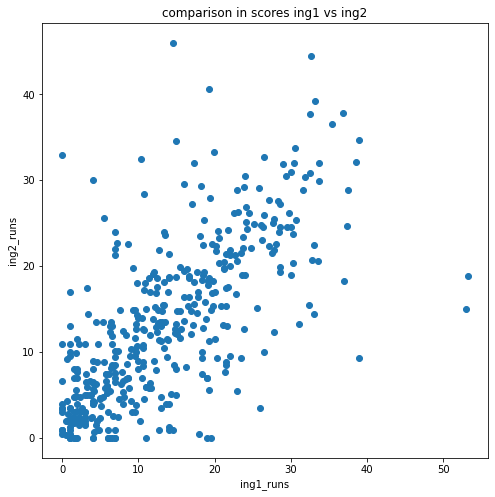

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(comb['ing1_RPI'],comb['ing2_RPI'])
plt.xlabel('ing1_runs')
plt.ylabel('ing2_runs')
plt.title('comparison in scores ing1 vs ing2')
plt.show()

ANNOTATIONS OF PLAYERS IN SCATTER PLOT

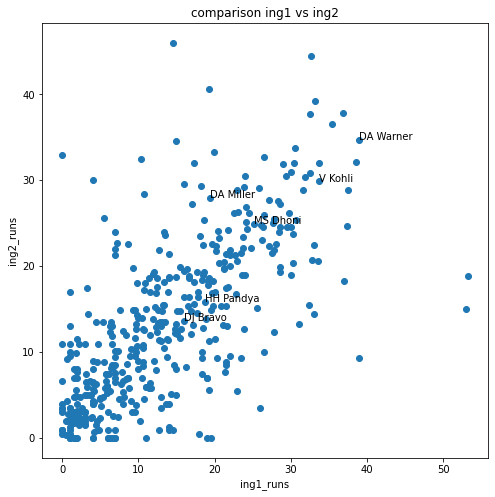

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(comb['ing1_RPI'],comb['ing2_RPI'])
plt.xlabel('ing1_runs')
plt.ylabel('ing2_runs')
plt.title('comparison ing1 vs ing2')

selected_players = ['V Kohli','MS Dhoni','HH Pandya','DJ Bravo','DA Miller', 'DA Warner']
annotations = list(comb['Batsman'])    #list of all players

for i,j in enumerate(annotations):    #i is index in list of all players in comb['batsman']
    if j in selected_players:        #j means players in our defined list eg. here v kohli dhoni and pandya
                                     #if our player matches with player in dataframe
            plt.annotate(j,(comb['ing1_RPI'][i],comb['ing2_RPI'][i]))  #j will be our players and next are x,y coordinates with index i in comb dataframe 
plt.show()

In [27]:
comb.Batsman.unique

<bound method Series.unique of 0      A Ashish Reddy   
1      A Chopra         
2      A Choudhary      
3      A Flintoff       
4      A Kumble         
5      A Mishra         
6      A Mithun         
7      A Mukund         
8      A Nehra          
9      A Nortje         
10     A Singh          
11     A Symonds        
12     A Uniyal         
13     AA Bilakhia      
14     AA Chavan        
15     AA Jhunjhunwala  
16     AB Agarkar       
17     AB Dinda         
18     AB McDonald      
19     AB de Villiers   
20     AC Blizzard      
21     AC Gilchrist     
22     AC Thomas        
23     AC Voges         
24     AD Hales         
25     AD Mascarenhas   
26     AD Mathews       
27     AD Nath          
28     AD Russell       
29     AF Milne         
30     AG Murtaza       
31     AG Paunikar      
32     AJ Finch         
33     AJ Turner        
34     AJ Tye           
35     AL Menaria       
36     AM Nayar         
37     AM Rahane        
38     AN Ahmed    

In [40]:
ing1_df.head(3)

,Batsman,ing1_RPI
0,A Ashish Reddy,12.769231
1,A Chandila,2.000000
2,A Chopra,10.200000


# COMPARISON OF balls per boundary

In [68]:
ing1_BPB_df = ing1_mdf[['Batsman','balls_per_boundary']].rename(columns={'balls_per_boundary':'ing1_BPB'})

ing2_BPB_df = ing2_mdf[['Batsman','balls_per_boundary']].rename(columns={'balls_per_boundary':'ing2_BPB'})

In [69]:
comb1 = pd.merge(ing1_BPB_df,ing2_BPB_df,on = 'Batsman')

In [70]:
comb1.head(3)


,Batsman,ing1_BPB,ing2_BPB
0,A Ashish Reddy,7.187500,5.4
1,A Chopra,10.285714,0.0
2,A Choudhary,12.000000,8.0


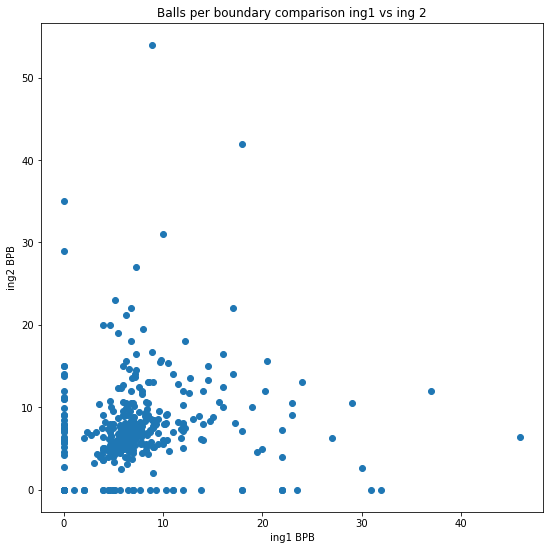

In [71]:
plt.figure(figsize=(9,9))
plt.scatter(comb1['ing1_BPB'],comb1['ing2_BPB'])
plt.xlabel('ing1 BPB')
plt.ylabel('ing2 BPB')
plt.title('Balls per boundary comparison ing1 vs ing 2')
plt.show()

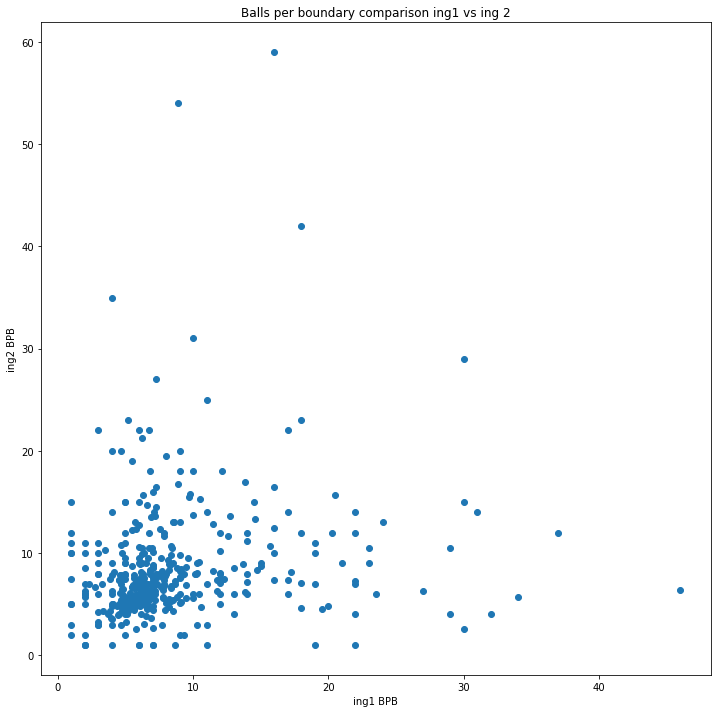

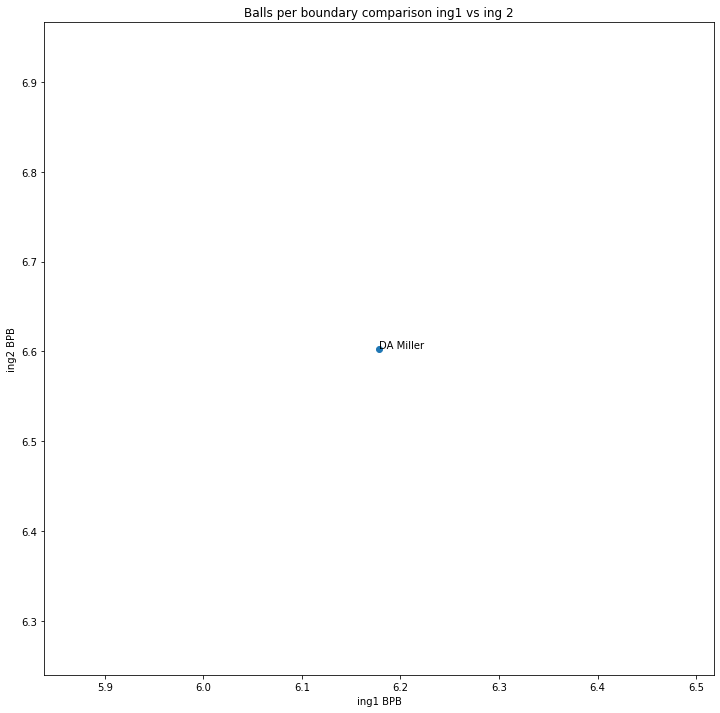

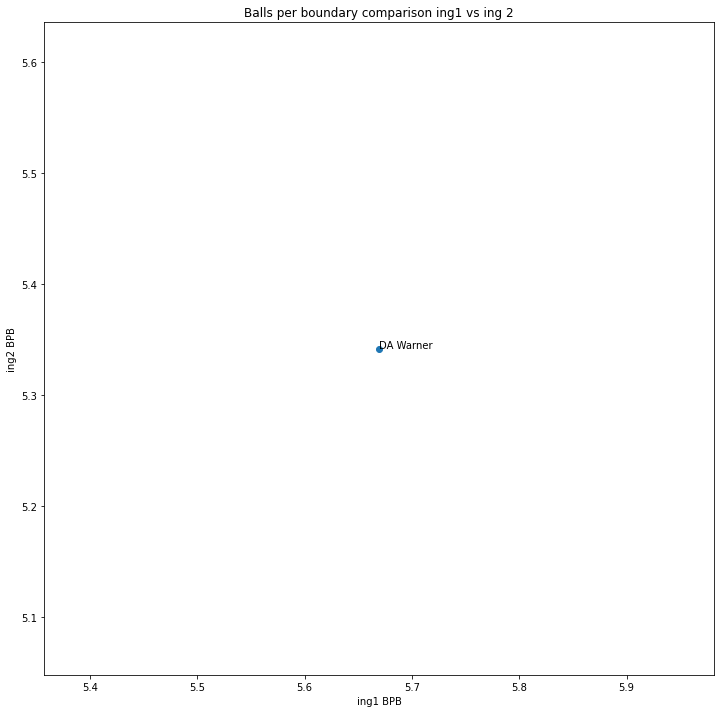

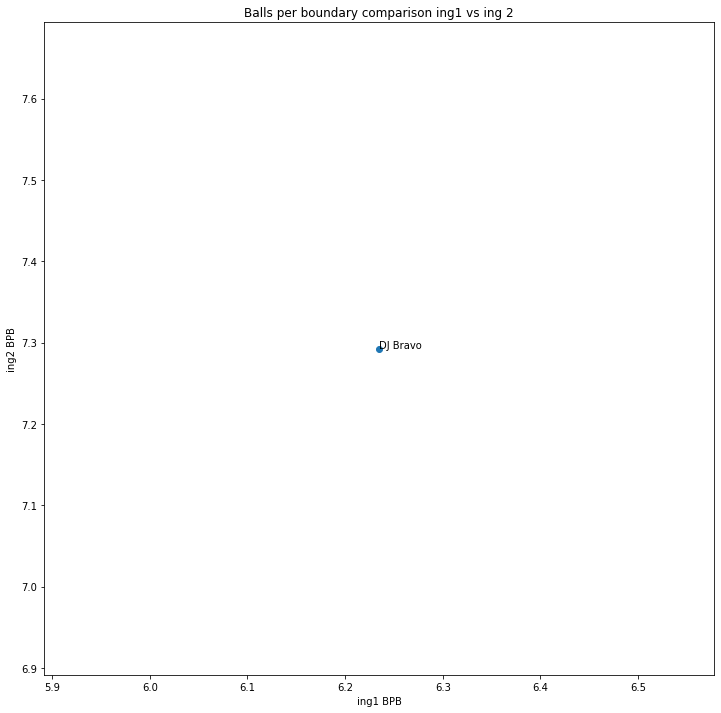

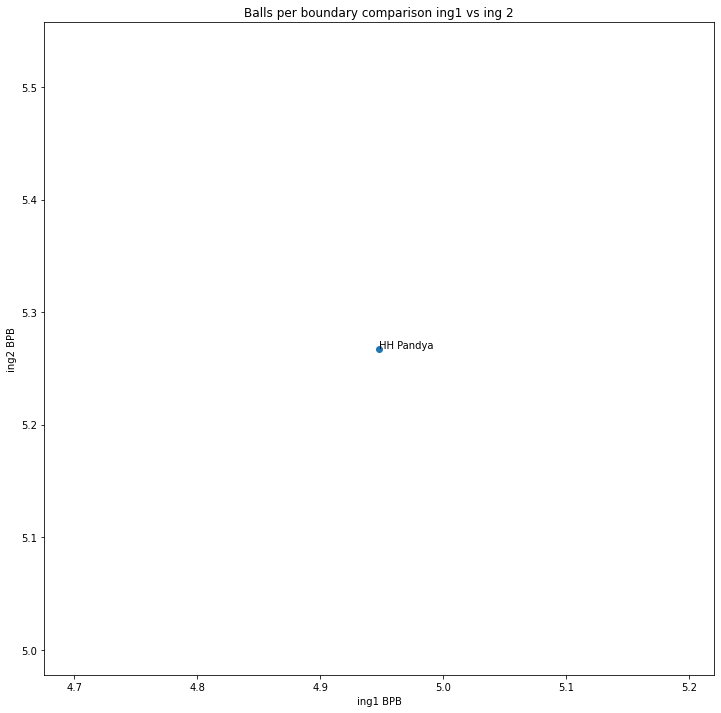

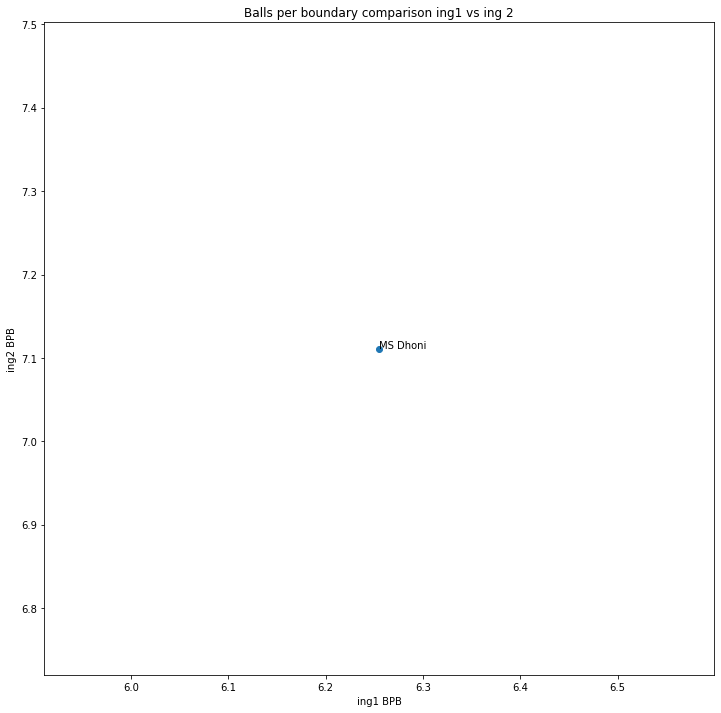

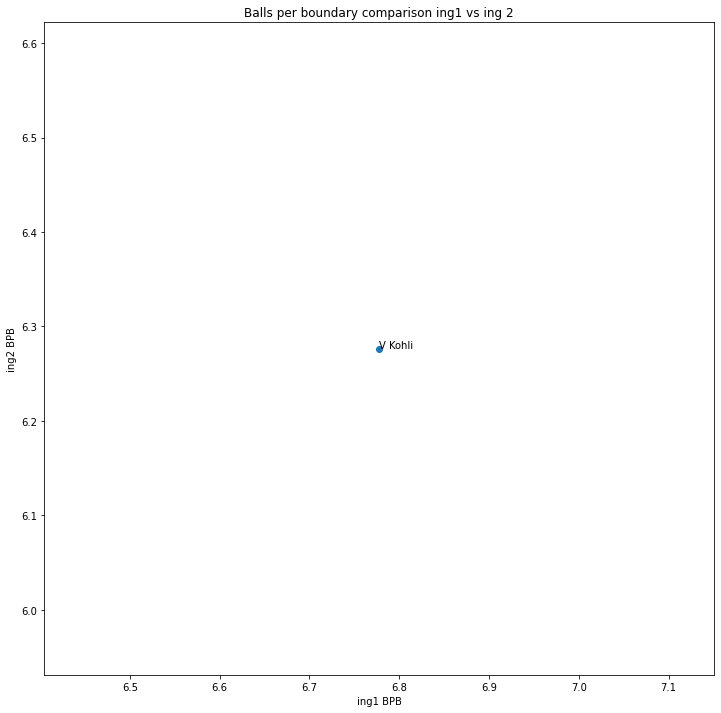

In [33]:
plt.figure(figsize=(12,12))
plt.scatter(comb1['ing1_BPB'],comb1['ing2_BPB'])
plt.xlabel('ing1 BPB')
plt.ylabel('ing2 BPB')
plt.title('Balls per boundary comparison ing1 vs ing 2')


selected_players = ['V Kohli','MS Dhoni','HH Pandya','DJ Bravo','DA Miller', 'DA Warner']
annotations = list(comb['Batsman'])    #list of all players

for i,j in enumerate(annotations):    #i is index in list of all players in comb['batsman']
    if j in selected_players:#j means players in our defined list eg. here v kohli dhoni and pandya
        plt.figure(figsize=(12,12))
        plt.scatter(comb1['ing1_BPB'][i],comb1['ing2_BPB'][i])
        plt.xlabel('ing1 BPB')
        plt.ylabel('ing2 BPB')
        plt.title('Balls per boundary comparison ing1 vs ing 2')                              #if our player matches with player in dataframe
        plt.annotate(j,(comb1['ing1_BPB'][i],comb1['ing2_BPB'][i]))  #j will be our players and next are x,y coordinates with index i in comb dataframe 
plt.show()

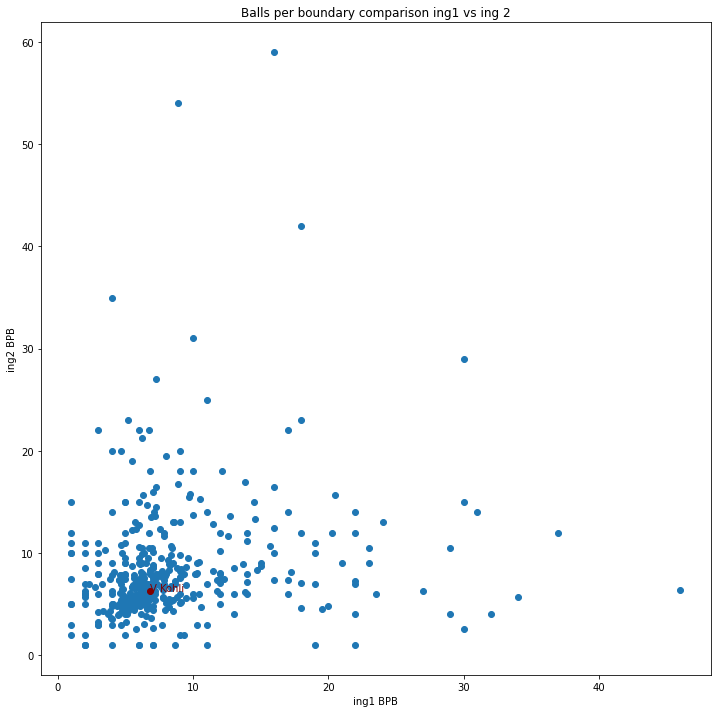

In [42]:
plt.figure(figsize=(12,12))
plt.scatter(comb1['ing1_BPB'],comb1['ing2_BPB'])
plt.xlabel('ing1 BPB')
plt.ylabel('ing2 BPB')
plt.title('Balls per boundary comparison ing1 vs ing 2')
for i in range(len(comb1)):
#     plt.text(x, y, text)
    if comb1['Batsman'][i] == 'V Kohli':
        plt.scatter(comb1['ing1_BPB'][i],comb1['ing2_BPB'][i],color = 'maroon')
        plt.text(comb1['ing1_BPB'][i], comb1['ing2_BPB'][i], comb1['Batsman'][i] ,c = 'maroon')
plt.show()

#  BATSMAN STATS AGAINST INDIVIDUAL BOWLER

In [72]:
def batsman_stats_by_bowler(df,current_batsman,current_bowler):
    df = df[df.striker == current_batsman]
    df = df[df.bowler == current_bowler]
    df.reset_index(inplace = True,drop = True)
    
    
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x==0 else 0 )
    df['isone'] = df['runs_off_bat'].apply(lambda x: 1 if x==1 else 0 )
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x==2 else 0 )
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x==3 else 0 )
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x==4 else 0 )
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x==6 else 0 )
    
    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat' : 'runs'})
    fours = df.groupby(['striker'])['isFour'].sum().reset_index().rename(columns = {'isFour':'Fours'})
    sixes = df.groupby(['striker'])['isSix'].sum().reset_index().rename(columns = {'isSix':'Sixes'})
    balls = df.groupby(['striker'])['match_id'].count().reset_index().rename(columns={'match_id':'balls'})
    innings = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns ={'match_id':'innings'})
    dots = df.groupby(['striker'])['isDot'].sum().reset_index().rename(columns={'isDot':'Dot_balls'})
    dismissals = df.groupby(['striker'])['player_dismissed'].count().reset_index().rename(columns={'player_dismissed':'dismissals'})
   
    df = pd.merge(innings ,runs , on = 'striker').merge(balls).merge(fours).merge(sixes).merge(dismissals).merge(dots).rename(columns={'striker':'Batsman'})
    df['SR'] = (df.runs/df.balls)*100
    df['Dot%'] = (df.Dot_balls/df.balls)*100
    df['Avg'] = df.apply(lambda x:batting_avg(x['runs'],x['dismissals']),axis = 1)
    df['balls_per_boundary'] = df.apply(lambda x: balls_per_boundary(x['balls'],(x['Fours']+x['Sixes'])),axis = 1)
    df['runs_in_boundary%'] = (((df.Fours*4) + (df.Sixes*6))/df.runs)*100
    df['RPI'] = df.runs/df.innings
   
    return df

In [73]:
df[df.bowling_team == 'Mumbai Indians'].bowler.unique()

array(['DS Kulkarni', 'A Nehra', 'AM Nayar', 'Harbhajan Singh',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'MM Patel', 'JEC Franklin', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JDP Oram',
       'JJ Bumrah', 'MG Johnson', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [74]:
batsman_stats_by_bowler(df,'V Kohli','JJ Bumrah')

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,V Kohli,13,120,83,14,4,4,31,144.578313,37.349398,30.0,4.611111,66.666667,9.230769


In [75]:
batsman_stats_by_bowler(df,'V Kohli','M Jansen')

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,V Kohli,1,11,7,2,0,0,2,157.142857,28.571429,11.0,3.5,72.727273,11.0


In [78]:
 batsman_stats_by_bowler(df,'V Kohli','Mustafizur Rahman')

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,V Kohli,5,50,38,4,2,1,12,131.578947,31.578947,50.0,6.333333,56.0,10.0


In [77]:
batsman_stats_by_bowler(df,'V Kohli','JP Behrendorff')

,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,V Kohli,1,5,6,1,0,1,4,83.333333,66.666667,5.0,6.0,80.0,5.0


# Top Run getters at a particular venue

In [87]:
def top_n_batsman_at_venue(df,top_n_batsman,current_venue):
    df = df[df.venue == current_venue]
#     df = df.sort_values(by = 'runs',ascending = False).head(topn_n_batsman)
    df.reset_index(inplace = True,drop = True)
    
    
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x==0 else 0 )
    df['isone'] = df['runs_off_bat'].apply(lambda x: 1 if x==1 else 0 )
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x==2 else 0 )
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x==3 else 0 )
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x==4 else 0 )
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x==6 else 0 )
    
    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat' : 'runs'})
    fours = df.groupby(['striker'])['isFour'].sum().reset_index().rename(columns = {'isFour':'Fours'})
    sixes = df.groupby(['striker'])['isSix'].sum().reset_index().rename(columns = {'isSix':'Sixes'})
    balls = df.groupby(['striker'])['match_id'].count().reset_index().rename(columns={'match_id':'balls'})
    innings = df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns ={'match_id':'innings'})
    dots = df.groupby(['striker'])['isDot'].sum().reset_index().rename(columns={'isDot':'Dot_balls'})
    dismissals = df.groupby(['striker'])['player_dismissed'].count().reset_index().rename(columns={'player_dismissed':'dismissals'})
   
    df = pd.merge(innings ,runs , on = 'striker').merge(balls).merge(fours).merge(sixes).merge(dismissals).merge(dots).rename(columns={'striker':'Batsman'})
    df['SR'] = (df.runs/df.balls)*100
    df['Dot%'] = (df.Dot_balls/df.balls)*100
    df['Avg'] = df.apply(lambda x:batting_avg(x['runs'],x['dismissals']),axis = 1)
    df['balls_per_boundary'] = df.apply(lambda x: balls_per_boundary(x['balls'],(x['Fours']+x['Sixes'])),axis = 1)
    df['runs_in_boundary%'] = (((df.Fours*4) + (df.Sixes*6))/df.runs)*100
    df['RPI'] = df.runs/df.innings
    
    df = df.sort_values(by = 'runs',ascending = False).head(top_n_batsman).reset_index()
    
    return df

In [ ]:
# top_n_batsman_at_venue(df,topn_n_batsman,current_venue):

In [81]:
df.venue.unique()

array(['M Chinnaswamy Stadium', 'Feroz Shah Kotla',
       'Punjab Cricket Association Stadium, Mohali', 'Eden Gardens',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [88]:
top_n_batsman_at_venue(df,15,'Punjab Cricket Association Stadium, Mohali')

,index,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,153,SE Marsh,21,806,649,81,25,19,256,124.191063,39.445300,42.421053,6.122642,58.808933,38.380952
1,36,DA Miller,13,416,276,25,22,9,77,150.724638,27.898551,46.222222,5.872340,55.769231,32.000000
2,75,KC Sangakkara,11,408,266,55,7,12,83,153.383459,31.203008,34.000000,4.290323,64.215686,37.090909
3,41,DJ Hussey,13,337,263,23,14,10,93,128.136882,35.361217,33.700000,7.108108,52.225519,25.923077
4,186,Yuvraj Singh,13,327,215,26,21,12,81,152.093023,37.674419,27.250000,4.574468,70.336391,25.153846
5,11,AC Gilchrist,12,277,236,34,4,11,98,117.372881,41.525424,25.181818,6.210526,57.761733,23.083333
6,112,Mandeep Singh,16,274,229,30,2,15,85,119.650655,37.117904,18.266667,7.156250,48.175182,17.125000
7,124,PC Valthaty,7,217,155,32,5,6,70,140.000000,45.161290,36.166667,4.189189,72.811060,31.000000
8,51,G Gambhir,4,216,151,28,2,4,47,143.046358,31.125828,54.000000,5.033333,57.407407,54.000000
9,98,MEK Hussey,4,209,126,19,11,2,40,165.873016,31.746032,104.500000,4.200000,67.942584,52.250000


In [89]:
top_n_batsman_at_venue(df,10,'M Chinnaswamy Stadium')

,index,Batsman,innings,runs,balls,Fours,Sixes,dismissals,Dot_balls,SR,Dot%,Avg,balls_per_boundary,runs_in_boundary%,RPI
0,240,V Kohli,58,1874,1418,165,82,53,544,132.157969,38.363893,35.358491,5.740891,61.472785,32.310345
1,45,CH Gayle,42,1534,1020,116,126,36,485,150.392157,47.549020,42.611111,4.214876,79.530639,36.523810
2,12,AB de Villiers,46,1401,916,110,82,33,304,152.947598,33.187773,42.454545,4.770833,66.523911,30.456522
3,95,JH Kallis,16,388,336,47,10,13,159,115.476190,47.321429,29.846154,5.894737,63.917526,24.250000
4,191,RV Uthappa,15,332,223,30,19,11,88,148.878924,39.461883,30.181818,4.551020,70.481928,22.133333
5,50,DA Warner,7,330,209,30,19,8,76,157.894737,36.363636,41.250000,4.265306,70.909091,47.142857
6,235,TM Dilshan,11,326,310,40,6,10,149,105.161290,48.064516,32.600000,6.739130,60.122699,29.636364
7,253,Yuvraj Singh,12,318,212,22,23,11,89,150.000000,41.981132,28.909091,4.711111,71.069182,26.500000
8,147,MS Dhoni,8,309,179,29,18,5,59,172.625698,32.960894,61.800000,3.808511,72.491909,38.625000
9,71,G Gambhir,10,299,241,36,5,9,87,124.066390,36.099585,33.222222,5.878049,58.193980,29.900000


# 